In [2]:
# If you are on a machine with intel cpu, you can use the following code to enable the intel mkl library for better performance
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Logistic Regression

In [3]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

### Logistic function


# $f(x)={\frac {1}{1+e^{-x}}}.$ 

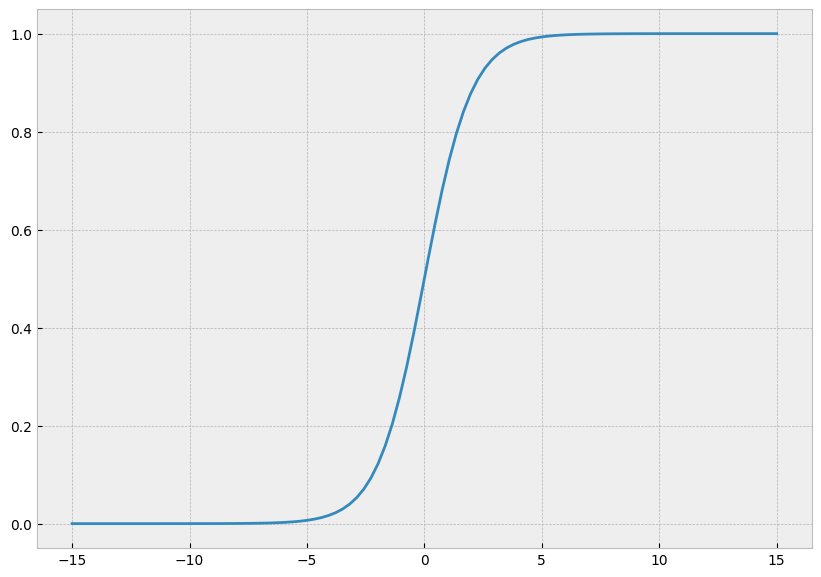

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-15,15,100)
plt.plot(x, sigmoid(x));

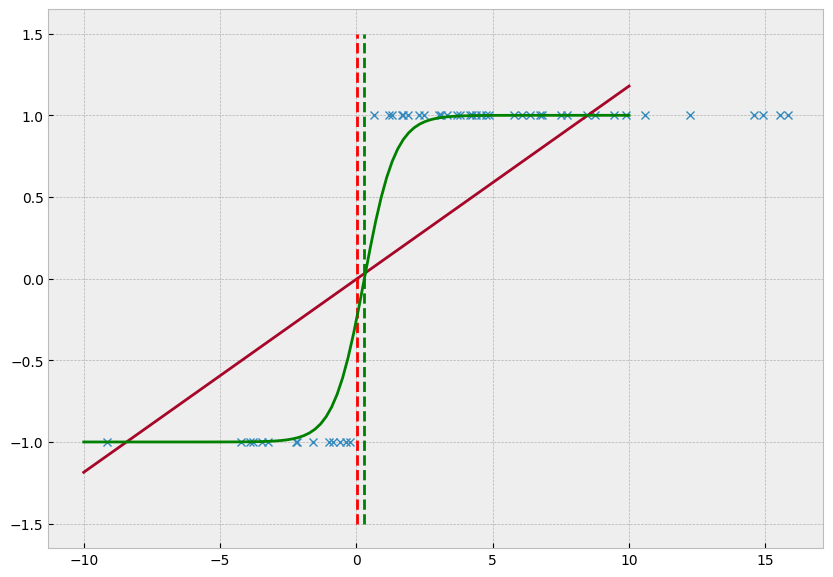

In [5]:
X = np.random.normal(5, 5, size=(50,1))
y0 = X[:,0]>0
y = y0.ravel()*2-1

# linear regression
regr = linear_model.LinearRegression()
regr.fit(X, y)
test_X=np.linspace(-10,10,100).reshape(-1,1)
plt.plot(X, y, 'x');
plt.plot(test_X, regr.predict(test_X))
plt.plot([-regr.intercept_/regr.coef_[0]]*2, [-1.5,1.5], 'r--')


# logistic regression
clf = linear_model.LogisticRegression()
clf.fit(X,y)
plt.plot(test_X, 2*sigmoid(test_X @ clf.coef_ +clf.intercept_)-1, 'g');
plt.plot([-clf.intercept_/clf.coef_[0]]*2, [-1.5,1.5], 'g--');

Logistic regression experiment



Use Iris dataset https://en.wikipedia.org/wiki/Iris_flower_data_set

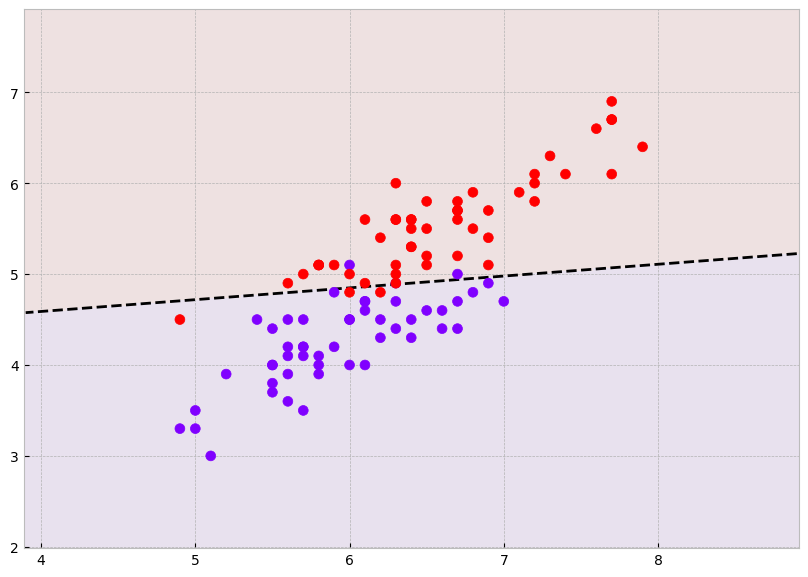

In [6]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# use only y=0,2 (for doing binary classification) and first two features of X (easier for visualization)
X = X[y!=0, ::2]
y = y[y!=0]
clf = linear_model.LogisticRegression()
clf.fit(X, y)

# boundary
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# mesh grid
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# compute logistic prediction on grid points
Z = clf.decision_function(grid.reshape(2, -1).T)
Z  = Z.reshape(grid.shape[1:])

# plot color and boundary
plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.05)
plt.contour(grid[0], grid[1], Z, colors=['k'], linestyles=['--'],
                levels=[0])

# lable the sample points
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=50);


## Q
* different settings

### Multi class

In [7]:
Z

array([[ -9.67847196,  -9.56707513,  -9.4556783 , ...,  12.26670434,
         12.37810118,  12.48949801],
       [ -9.69072683,  -9.57933   ,  -9.46793316, ...,  12.25444948,
         12.36584631,  12.47724315],
       [ -9.7029817 ,  -9.59158486,  -9.48018803, ...,  12.24219461,
         12.35359145,  12.46498828],
       ...,
       [-12.09268051, -11.98128367, -11.86988684, ...,   9.8524958 ,
          9.96389264,  10.07528947],
       [-12.10493537, -11.99353854, -11.8821417 , ...,   9.84024094,
          9.95163777,  10.06303461],
       [-12.11719024, -12.0057934 , -11.89439657, ...,   9.82798607,
          9.93938291,  10.05077974]])

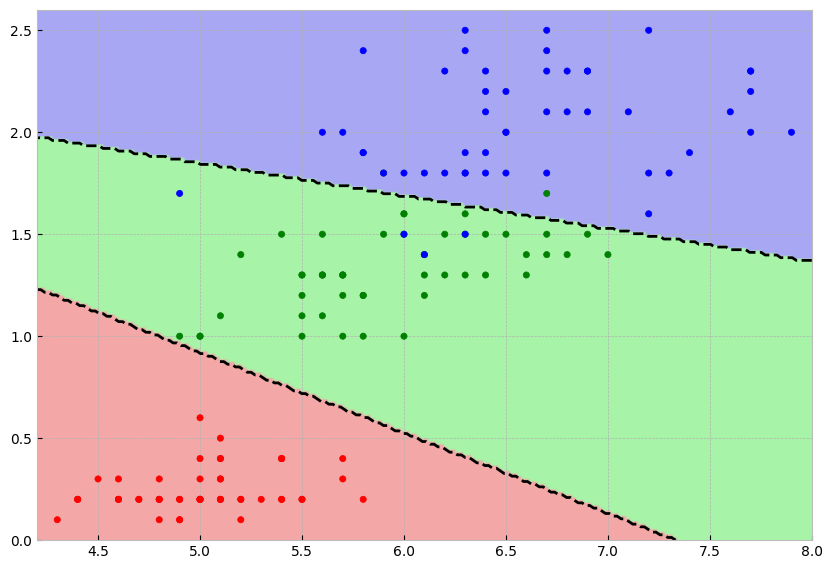

In [8]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# choose only two features
X = X[:, [0,3]]

clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X, y)

# boundary
x_min, y_min = X.min(axis=0)-0.1
x_max, y_max = X.max(axis=0)+0.1

# mesh grid
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)
# feature, x, y

# compute logistic prediction on grid points
# batch x feature
# 40000 x 2
Z = clf.predict_proba(grid.reshape(2, -1).T)
# the shape of Z is (40000, 3): batch x class
# 圖片
Z  = Z.reshape(200, 200, 3)
Z2 = np.zeros_like(Z)
for i in range(200):
    for j in range(200):
        Z2[i,j, Z[i,j].argmax()] = 1
Z = Z2
# a more elegant way to do the above loop is:
# Z2 = np.zeros_like(Z)
# Z2[np.arange(200), np.arange(200), Z.argmax(axis=2)] = 1
#Z = Z.swapaxes(0,1)[::-1, :]    

# plot color and boundary
# we need to swap axes and reverse y-axis to make the plot look right
plt.imshow(Z.swapaxes(0,1)[::-1, :], extent=(x_min, x_max, y_min, y_max), alpha=0.3)
plt.contour(grid[0], grid[1], Z.argmax(axis=2), 
            colors=['k','k','k'], linestyles=['--'],levels=[0,1,2], alpha=1)

# lable the sample points
plt.scatter(X[:,0], X[:, 1],  c=["rgb"[i] for i in y], zorder=10, s=20);

## sklearn.metrics
sklearn provides utilities to calculate common used metrics.

0.96

[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]

Predicted                     
                     setosa versicolor virginica
Actual setosa            50          0         0
       versicolor         0         48         2
       virginica          0          4        46

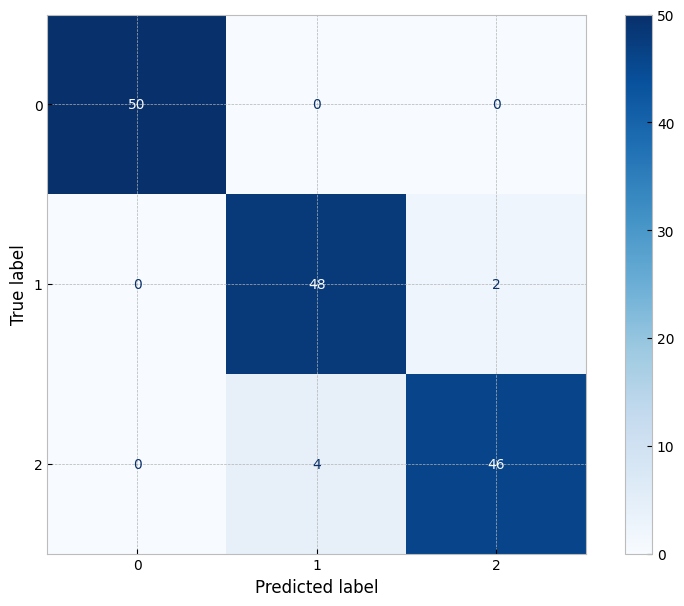

Class 0: precision=[1.], recall=[1.], f1=[1.]

Class 1: precision=[0.92307692], recall=[0.96], f1=[0.94117647]

Class 2: precision=[0.95833333], recall=[0.92], f1=[0.93877551]

precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

In [18]:
# metric function for classification
from sklearn import metrics
from rich import print
import pandas as pd
from IPython.display import display
y_pred = clf.predict(X)
print(metrics.accuracy_score(y, y_pred)) # accuracy
confusion_matrix = metrics.confusion_matrix(y, y_pred)
print(confusion_matrix)
confusion_df = pd.DataFrame(confusion_matrix, 
                            index=datasets.load_iris().target_names, 
                            columns=datasets.load_iris().target_names)
confusion_df.columns = pd.MultiIndex.from_product([['Predicted'], confusion_df.columns])
confusion_df.index = pd.MultiIndex.from_product([['Actual'], confusion_df.index])
display(confusion_df)
metrics.ConfusionMatrixDisplay(confusion_matrix).plot(cmap='Blues', values_format='d');
plt.show()
# We can calculate the precision, recall, and F1 score for each class
for i in range(3):
    precision = metrics.precision_score(y, y_pred, labels=[i], average=None)
    recall = metrics.recall_score(y, y_pred, labels=[i], average=None)
    f1 = metrics.f1_score(y, y_pred, labels=[i], average=None)
    print(f"Class {i}: precision={precision}, recall={recall}, f1={f1}")    
# Or we can use the following function to get all the metrics at once
print(metrics.classification_report(y, y_pred, target_names=datasets.load_iris().target_names))



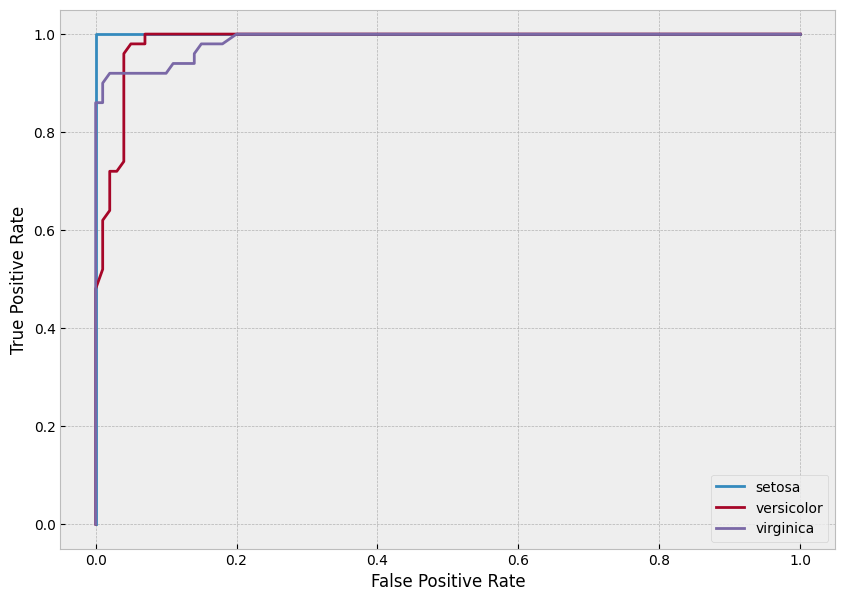

In [9]:
# plot ROC curve for each class
y_score = clf.predict_proba(X)
for i in range(3):
    fpr, tpr, _ = metrics.roc_curve(y, y_score[:,i], pos_label=i)
    plt.plot(fpr, tpr, label=datasets.load_iris().target_names[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

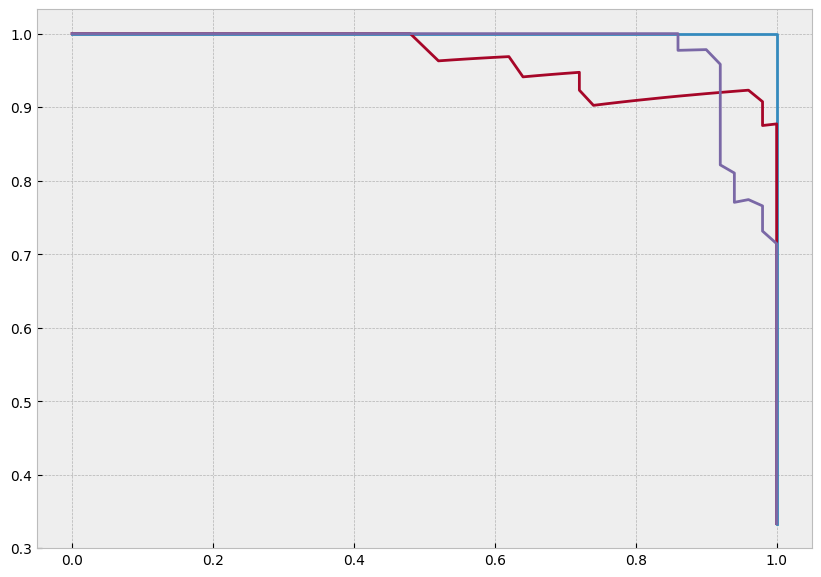

In [10]:
# plot precision-recall curve for each class
for i in range(3):
    precision, recall, _ = metrics.precision_recall_curve(y, y_score[:,i], pos_label=i)
    plt.plot(recall, precision, label=datasets.load_iris().target_names[i])

## MNIST

In [11]:
# Download the MNIST dataset using '01-From NumPy to Mnist.ipynb'
# if you haven't done so already
def read_dataset(prefix):
    images = np.fromfile(prefix + '-images.idx3-ubyte', dtype='uint8', offset=16).reshape(-1, 28*28)/255
    labels = np.fromfile(prefix + '-labels.idx1-ubyte', dtype='uint8', offset=8)
    return images, labels
train_set = read_dataset('train')
test_set = read_dataset('t10k')
train_X, train_y = train_set
test_X, test_y = test_set

In [12]:
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [13]:
%%timeit -n 1 -r 1
clf.fit(train_X, train_y)

23.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
pred_y = clf.predict(train_X)
print(np.mean(pred_y == train_y))
print("accuracy", metrics.accuracy_score(train_y, pred_y))
print(metrics.classification_report(train_y, pred_y))

0.9392666666666667

accuracy 0.9392666666666667

precision    recall  f1-score   support

           0       0.97      0.98      0.98      5923
           1       0.96      0.98      0.97      6742
           2       0.94      0.92      0.93      5958
           3       0.92      0.91      0.92      6131
           4       0.94      0.95      0.94      5842
           5       0.91      0.91      0.91      5421
           6       0.96      0.97      0.96      5918
           7       0.95      0.95      0.95      6265
           8       0.91      0.90      0.91      5851
           9       0.92      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000

In [15]:
pred_y = clf.predict(test_X)
print(np.mean(pred_y == test_y))
print("accuracy", metrics.accuracy_score(test_y, pred_y))
print(metrics.classification_report(test_y, pred_y))

0.9256

accuracy 0.9256

precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

## Q
* `multi_class ="ovr"` 
  ovr stands one vs rest

## Use diffrent features

In [16]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
toyX = [[1,2], [0, 1], [1,0], [1,1]]
poly.fit_transform(toyX)

array([[1., 1., 2., 1., 2., 4.],
       [1., 0., 1., 0., 0., 1.],
       [1., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1.]])

In [17]:
# however, we got too many features when applying to the MNIST dataset
poly.fit_transform(train_X[:10]).shape

(10, 308505)

In [18]:
# we can reduce the number of features by downsampling the image
poly.fit_transform(train_X.reshape(-1, 28, 28)[:, ::2, ::2].reshape(-1, 14*14)[:10]).shape

(10, 19503)

In [19]:
# let's try to use the downsampled image to train a logistic regression model
train_X2 = train_X.reshape(-1, 28, 28)[:, ::2, ::2].reshape(-1, 14*14)
train_X2 = poly.fit_transform(train_X2)
test_X2 = test_X.reshape(-1, 28, 28)[:, ::2, ::2].reshape(-1, 14*14)
test_X2 = poly.fit_transform(test_X2)

In [20]:
# can take a long time to train
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, verbose=1)
clf.fit(train_X2, train_y)
pred_y = clf.predict(train_X2)
print("accuracy", metrics.accuracy_score(train_y, pred_y))
print(metrics.classification_report(train_y, pred_y))
pred_y = clf.predict(test_X2)
print("accuracy", metrics.accuracy_score(test_y, pred_y))
print(metrics.classification_report(test_y, pred_y))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       195040     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38155D+05    |proj g|=  4.26543D+03

At iterate   50    f=  1.97804D+03    |proj g|=  4.74062D+01

At iterate  100    f=  1.24548D+03    |proj g|=  3.00026D+00

At iterate  150    f=  1.16470D+03    |proj g|=  2.33775D+00

At iterate  200    f=  1.15605D+03    |proj g|=  6.90862D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    200    213      1     0     0   6.909D-01   1.156D+03
  F =   1156.0502652977329     

STOP: T

/home/tjw/miniforge3/envs/edu/lib/python3.12/site-packages/daal4py/sklearn/linear_model/logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.9998833333333333

precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

accuracy 0.9767

precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

In [43]:
# Use random features like what we did in the previous lecture
# ref: extreme learning machine https://en.wikipedia.org/wiki/Extreme_learning_machine
random_matrix = np.random.uniform(-1, 1,size=[784, 8192])
train_X2 = np.abs(train_X@random_matrix)
test_X2 = np.abs(test_X@random_matrix)

In [44]:
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', verbose=1, C=0.001, max_iter=200)
clf.fit(train_X2, train_y)
pred_y = clf.predict(train_X2)
print("accuracy", metrics.accuracy_score(train_y, pred_y))
print(metrics.classification_report(train_y, pred_y))
pred_y = clf.predict(test_X2)
print("accuracy", metrics.accuracy_score(test_y, pred_y))
print(metrics.classification_report(test_y, pred_y))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        81930     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38155D+05    |proj g|=  5.55517D+04


 This problem is unconstrained.



At iterate   50    f=  5.59503D+03    |proj g|=  1.62004D+03

At iterate  100    f=  2.02000D+03    |proj g|=  9.12219D+02

At iterate  150    f=  1.51567D+03    |proj g|=  1.61685D+02

At iterate  200    f=  1.41737D+03    |proj g|=  4.31789D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
81930    200    217      1     0     0   4.318D+01   1.417D+03
  F =   1417.3684573424086     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/tjw/miniforge3/envs/edu/lib/python3.12/site-packages/daal4py/sklearn/linear_model/logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 1.0

precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

accuracy 0.9805

precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000